iteration 	 x_min 		    x_max 		 f 			 v 			 s
------------------------------------------------------------------------------------------------------------------------
    1	     -0.0000000000 	 3.0000000000 	 3.00000 | (59, 0) 	 1.00000 | (59, 0) 	 0.16667 | (58, 0)
    2	     -0.5689119600 	 4.9990304642 	 7.99903 | (59, 0) 	 1.89043 | (31, 0) 	 0.86311 | (0, 0)
    3	     -2.2695893635 	 0.2743106571 	 5.72944 | (59, 0) 	 1.25540 | (34, 0) 	 0.58229 | (0, 0)
    4	     -0.8077337924 	 0.1079004735 	 4.92171 | (59, 0) 	 1.03404 | (38, 0) 	 0.48572 | (0, 0)
    5	     -0.1345682662 	 0.0203085508 	 4.78714 | (59, 0) 	 1.00058 | (47, 0) 	 0.47040 | (0, 0)
    6	     -0.0038249642 	 0.0006513085 	 4.78331 | (59, 0) 	 1.00000 | (59, 0) 	 0.46999 | (0, 0)
    7	     -0.0000029607 	 0.0000005723 	 4.78331 | (59, 0) 	 1.00000 | (59, 0) 	 0.46999 | (0, 0)
    8	     -0.0000000000 	 0.0000000000 	 4.78331 | (59, 0) 	 1.00000 | (59, 0) 	 0.46999 | (0, 0)

finish


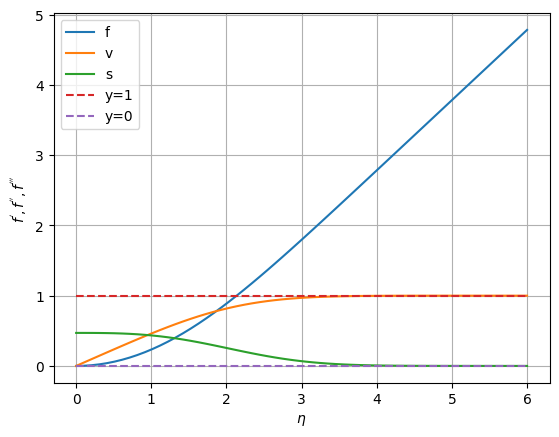

  eta 		    f 		    v 		    s
------------------------------------------------------------
0.00000 	 0.00000 	 -0.000000 	 0.469988
0.10169 	 0.00243 	 0.047792 	 0.469930
0.20339 	 0.00972 	 0.095567 	 0.469640
0.30508 	 0.02186 	 0.143289 	 0.468886
0.40678 	 0.03886 	 0.190899 	 0.467440
0.50847 	 0.06068 	 0.238315 	 0.465081
0.61017 	 0.08731 	 0.285434 	 0.461594
0.71186 	 0.11871 	 0.332131 	 0.456783
0.81356 	 0.15484 	 0.378263 	 0.450474
0.91525 	 0.19561 	 0.423669 	 0.442517
1.01695 	 0.24096 	 0.468177 	 0.432802
1.11864 	 0.29078 	 0.511604 	 0.421256
1.22034 	 0.34495 	 0.553762 	 0.407855
1.32203 	 0.40334 	 0.594464 	 0.392627
1.42373 	 0.46578 	 0.633529 	 0.375651
1.52542 	 0.53210 	 0.670786 	 0.357062
1.62712 	 0.60211 	 0.706080 	 0.337047
1.72881 	 0.67560 	 0.739277 	 0.315839
1.83051 	 0.75236 	 0.770271 	 0.293710
1.93220 	 0.83215 	 0.798983 	 0.270962
2.03390 	 0.91474 	 0.825367 	 0.247918
2.13559 	 0.99990 	 0.849409 	 0.224902
2.23729 	 1.08739 	 0.871128

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import sympy as sy

# Input
eta = 6
n = 60
m = 1/4

Error = 10**(-6)

h = eta/(n-1)

a = np.zeros((n,1))
b = np.zeros((n,1))
c = np.zeros((n,1))

w = np.zeros((3*n, 3*n))
R = np.zeros((3*n,1))


print("iteration \t x_min \t\t    x_max \t\t f \t\t\t v \t\t\t s")
#     print("det_w")
print('-'*120)
z = 0

while  z<500 :     
    
    z += 1

    for j in range(n):
        i = 3*j
        
        if j>0 :
            Aj = np.array([[0, -1/h, -1/2],
                            [m*(c[j][0]+c[j-1][0]), 0, m*(a[j][0]+a[j-1][0]) - 1/h],
                            [0, 0, 0]])
            w[i:i+3, i-3:i] = Aj
            
        if j == 0 :
            B0 = np.array([[1, 0 , 0],
                            [ 0,  1 , 0],
                            [-1/h, -1/2 , 0]])
            w[i:i+3, i:i+3] = B0
            
            R0 = np.array([[a[0][0]],
                            [b[0][0]],
                            [(a[1][0]-a[0][0])/h - (b[1][0]+b[0][0])/2]])
            R[i:i+3] = R0
        
        elif j>0 and j<n-1 :
            Bj = np.array([[0, 1/h, -1/2],
                            [m*(c[j][0]+c[j-1][0]), 0, m*(a[j][0]+a[j-1][0]) + 1/h],
                            [-1/h, -1/2, 0]])
            w[i:i+3, i:i+3] = Bj
            
            Rj = np.array([[(b[j][0] - b[j-1][0])/h - (c[j][0] + c[j-1][0])/2],
                            [(c[j][0] - c[j-1][0])/h + m*(a[j][0]+a[j-1][0])*(c[j][0]+c[j-1][0])],
                            [(a[j+1][0] - a[j][0])/h - (b[j+1][0]+b[j][0])/2]])
            R[i:i+3] = Rj
            
        else :

            BN = np.array([[0, 1/h, -1/2],
                            [m*(c[n-1][0]+c[n-2][0]), 0, m*(a[n-1][0]+a[n-2][0]) + 1/h],
                            [0, 1, 0]])
            w[i:i+3, i:i+3] = BN
            
            RN = np.array([[(b[n-1][0] - b[n-2][0])/h - (c[n-1][0] + c[n-2][0])/2],
                            [(c[n-1][0] - c[n-2][0])/h + m*(a[n-1][0]+a[n-2][0])*(c[n-1][0]+c[n-2][0])],
                            [b[n-1][0]-1]])
            R[i:i+3] = RN
        
        if j != n-1 :
            C = np.array([[0, 0, 0],
                            [0, 0, 0],
                            [1/h, -1/2, 0]])
            w[i:i+3, i+3:i+6] = C 
    
#         det_w = np.linalg.det(w)
    x = np.linalg.solve(w, -R)
            
    a += x[0::3]
    b += x[1::3]
    c += x[2::3]
    
    print(f"    {z}\t     {np.min(x):0.10f} \t {np.max(x):0.10f} \t {np.max(a):0.5f} | {np.unravel_index(np.argmax(a), a.shape)} \t {np.max(b):0.5f} | {np.unravel_index(np.argmax(b), b.shape)} \t {np.max(c):0.5f} | {np.unravel_index(np.argmax(c), c.shape)}")
#         print(f"{det_w:0.5f}")
#         print(np.allclose(np.dot(w, x), -R))
    if np.max(x)<Error and np.min(x)>(-1*Error):
        break
        
print("\nfinish")

eta1 = np.linspace(0, eta, n)
plt.plot(eta1, a, label="f")
plt.plot(eta1, b, label="v")
plt.plot(eta1, c, label="s")
plt.plot(eta1, eta1*0+1, "--", label="y=1")
plt.plot(eta1, eta1*0, "--", label="y=0")
plt.xlabel("$ \eta $") 
plt.ylabel("$ f^{'} , f^{''} , f^{'''}$ ")
plt.legend()
plt.grid()
plt.show()

print("  eta \t\t    f \t\t    v \t\t    s")
print("-"*60)
for i in range(n) :
    print(f"{eta1[i]:0.5f} \t {a[i][0]:0.5f} \t {b[i][0]:0.6f} \t {c[i][0]:0.6f}")


# <div style="direction:rtl"><font face="IRANSans" size="6"> فراخوانی مقادیر جدول بلازیوس از کتاب وایت که به صورت فایل ذخیره کرده ایم: </font></div>

In [4]:
import pandas as pd
dataset = pd.read_csv('Blasius.csv')
eta_white = dataset.iloc[:, 0]
f_white = dataset.iloc[:, 1]
v_white = dataset.iloc[:, 2]
s_white = dataset.iloc[:, 3]

# <div style="direction:rtl"><font face="IRANSans" size="6">  مقایسه نمودارهای بلازیوس از کتاب وایت و روش کلر باکس: </font></div>

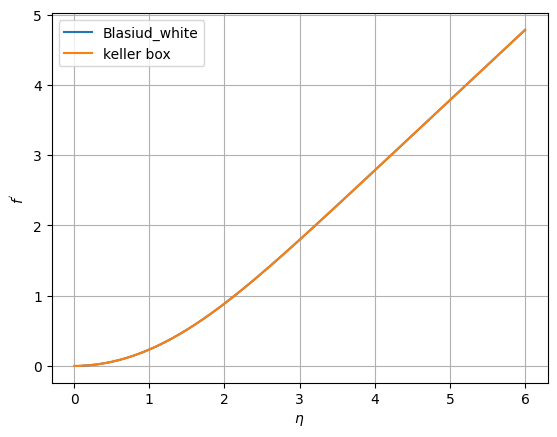

In [5]:
plt.plot(eta_white, f_white, label="Blasiud_white")
plt.plot(eta1, a, label="keller box")
plt.xlabel("$ \eta $") 
plt.ylabel("$ f^{'}$ ")
plt.legend()
plt.grid()
plt.show()

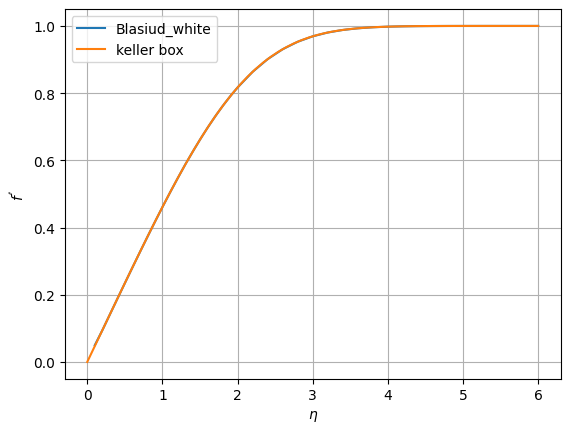

In [6]:
plt.plot(eta_white, v_white, label="Blasiud_white")
plt.plot(eta1, b, label="keller box")
plt.xlabel("$ \eta $") 
plt.ylabel("$ f^{''}$ ")
plt.legend()
plt.grid()
plt.show()

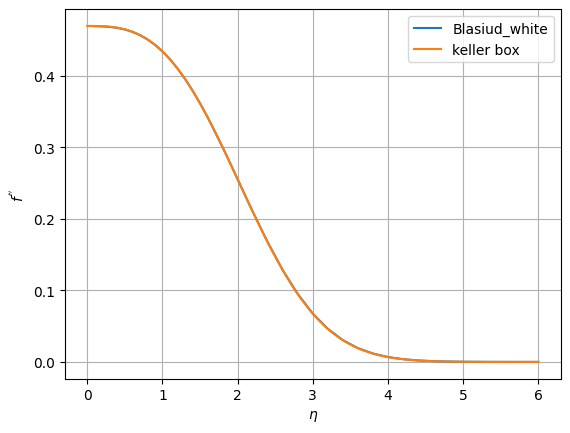

In [8]:
plt.plot(eta_white, s_white, label="Blasiud_white")
plt.plot(eta1, c, label="keller box")
plt.xlabel("$ \eta $") 
plt.ylabel("$ f^{'''}$ ")
plt.legend()
plt.grid()
plt.show()